In [13]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

df = pd.read_csv("./taylor_swift_spotify.csv")
taylor = list(df.columns)


def milliseconds_to_seconds(duration_ms):
  return duration_ms / 1000

def taylorsversion_to_tv(name):
  name = str(name)
  name = name.replace("Taylor's Version","TV")
  return name


def redondear(energy):
  energy = str(energy)
  energy = energy[:3]
  return energy




df["name"] = df["name"].apply(taylorsversion_to_tv)
df["energy"] = df["energy"].apply(redondear)
df["duration_ms"] = df["duration_ms"].apply(milliseconds_to_seconds)
print(df)



df.to_csv('./TPtaylor.csv')





     Unnamed: 0                                  name  \
0             0              Welcome To New York (TV)   
1             1                      Blank Space (TV)   
2             2                            Style (TV)   
3             3                 Out Of The Woods (TV)   
4             4       All You Had To Do Was Stay (TV)   
..          ...                                   ...   
525         525                              Our Song   
526         526         I'm Only Me When I'm With You   
527         527                             Invisible   
528         528                A Perfectly Good Heart   
529         529  Teardrops on My Guitar - Pop Version   

                                album release_date  track_number  \
0    1989 (Taylor's Version) [Deluxe]   2023-10-27             1   
1    1989 (Taylor's Version) [Deluxe]   2023-10-27             2   
2    1989 (Taylor's Version) [Deluxe]   2023-10-27             3   
3    1989 (Taylor's Version) [Deluxe]   202

<ipython-input-10-4e2551740607>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['release_year'] = df_filtered['release_date'].str[:4]


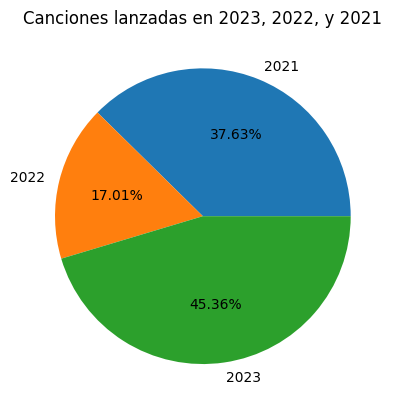

In [10]:
#Grafico 1:
# Filtrar los datos que solo incluyan en la fecha: 2023, 2022 y 2021
df_filtered = df[df['release_date'].str.contains('2023|2022|2021')]

# Extraer los datos de la columna  release_date
df_filtered['release_year'] = df_filtered['release_date'].str[:4]

#agrupar los datos filtrados(release_year) y contar el numero de canciones de ese año
grouped_df = df_filtered.groupby('release_year')['name'].count()

values = grouped_df.values.tolist()
labels = grouped_df.index.astype(str).tolist()

plt1.pie(values, labels=labels, autopct='%.2f%%')
plt1.title('Canciones lanzadas en 2023, 2022, y 2021')
plt1.show()


Este grafico representa el porcentaje de canciones lanzadas por año, podemos concluie que el año donde hubo mas lanzamientos fue el 2023

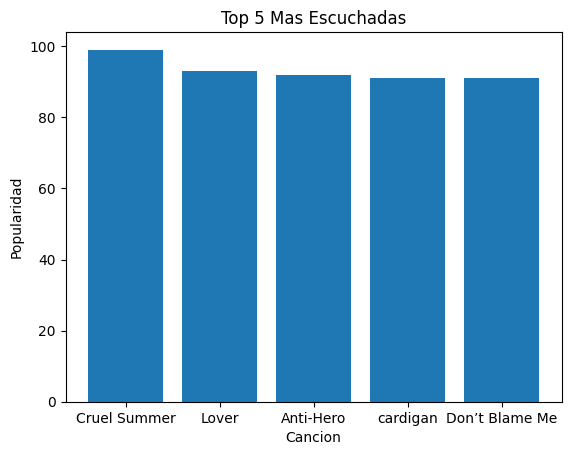

In [11]:
#Grafico 2:

#ordenar la popularidad y selecccionar los top 5
df_sorted = df.sort_values(by='popularity', ascending=False)
top_5_songs = df_sorted.head(5)

#extraer los nombres y la popularidad de esas canciones
song_names = top_5_songs['name'].tolist()
popularity_values = top_5_songs['popularity'].tolist()


plt1.bar(song_names, popularity_values)
plt1.xlabel('Cancion')
plt1.ylabel('Popularidad')
plt1.title('Top 5 Mas Escuchadas')
plt1.show()


Este grafico representa las top 5 canciones mas populares, podemos observar que la mas popular es Cruel Summer

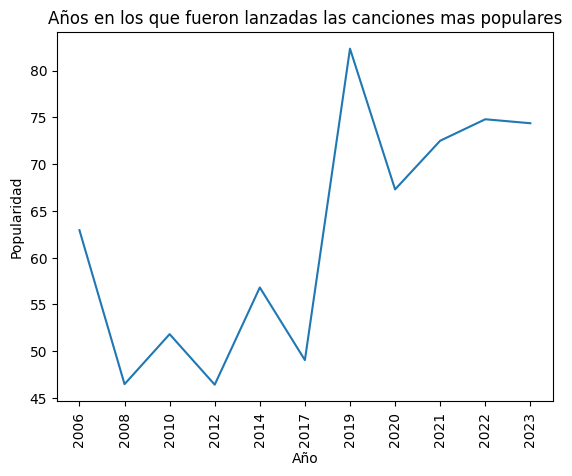

In [12]:
#Grafico 3


# Extraer el año de las columnas
df['release_year'] = df['release_date'].str[:4]

#agrupar por año y ccalcular el promedio de la popularidas
grouped_df = df.groupby('release_year')['popularity'].mean()

# Extraer el año y la popularida
years = grouped_df.index.astype(str)
popularity_values = grouped_df.values

plt2.plot(years, popularity_values)
plt2.xticks(rotation=90)  # Rotar el año 90 grados, para que entre :)
plt2.xlabel('Año')
plt2.ylabel('Popularidad')
plt2.title('Años en los que fueron lanzadas las canciones mas populares')
plt2.show()

Este grafico representa en que año salieron la canciones mas escuchadas, podemos observar que las mas populares salieron entre 2018 y 2019

In [ ]:
from google.colab import drive
drive.mount('/content/drive')